## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy import stats

# Study data files
mouse_metadata_path = "../data/Mouse_metadata.csv"
study_results_path = "../data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined = pd.merge(mouse_metadata, study_results, how = "outer", on = "Mouse ID")
combined.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice in the DataFrame.
mice =combined["Mouse ID"].nunique()
mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mousedup=combined.loc[combined.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"].unique()
# duplicate_mouse=merge_df.loc[merge_df.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
mousedup

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dataforduplicate=combined[combined["Mouse ID"]== 'g989'] 
dataforduplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df=combined[combined["Mouse ID"].isin(mousedup) == False]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
mice2 =len(clean_df["Mouse ID"].unique())
mice2

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean=clean_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
median=clean_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
variance=clean_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
sd=clean_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
sem=clean_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

# This method is the most straightforward, creating multiple series and putting them all together at the end.
summarystats_df=pd.DataFrame({"Mean Tumor Volume":mean,"Median Tumor Volume":median,"Variance":variance, "Standard Dev.": sd, "SEM": sem})
summarystats_df=summarystats_df.round(2)
summarystats_df


,Mean Tumor Volume,Median Tumor Volume,Variance,Standard Dev.,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# summarystats2_df=DataFrame.describe(clean_df: ~ FrameOrSeries, percentiles=None, include=None, exclude=None) 

summarystats2_df = pd.DataFrame(clean_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']}))
summarystats2_df=summarystats2_df.round(2)
summarystats2_df
# This method produces everything in a single groupby function.

Tumor Volume (mm3)                          
                           mean median    var   std   sem
Drug Regimen                                             
Capomulin                 40.68  41.56  24.95  4.99  0.33
Ceftamin                  52.59  51.78  39.29  6.27  0.47
Infubinol                 52.88  51.82  43.13  6.57  0.49
Ketapril                  55.24  53.70  68.55  8.28  0.60
Naftisol                  54.33  52.51  66.17  8.13  0.60
Placebo                   54.03  52.29  61.17  7.82  0.58
Propriva                  52.32  50.45  43.85  6.62  0.54
Ramicane                  40.22  40.67  23.49  4.85  0.32
Stelasyn                  54.23  52.43  59.45  7.71  0.57
Zoniferol                 53.24  51.82  48.53  6.97  0.52

## Bar Plots

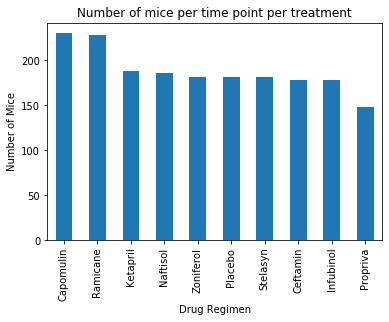

In [9]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
counts = clean_df["Drug Regimen"].value_counts()
counts.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of Mice")
plt.title("Number of mice per time point per treatment")
plt.show()


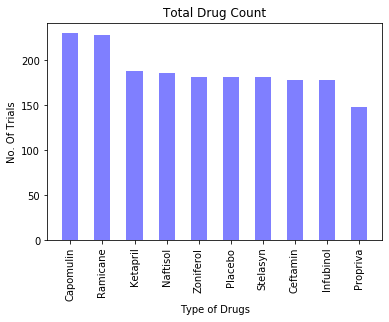

In [10]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

Eachpoint = clean_df["Drug Regimen"].value_counts()
y_axis=Eachpoint.values
x_axis=np.arange(0,len(y_axis),1)
x_drugs=Eachpoint.index

#plotting
plt.bar(x_drugs, y_axis, color='b', alpha=0.5, align= "center", width= .5)

plt.ylabel("No. Of Trials")
plt.xlabel("Type of Drugs")
plt.title("Total Drug Count")
plt.xticks(rotation=90)

plt.show()

## Pie Plots

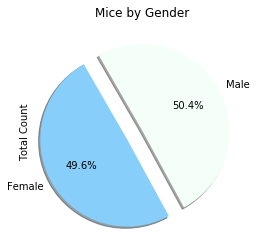

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

df_data = clean_df.groupby(["Mouse ID", "Sex"])
df_gender = pd.DataFrame(df_data.size())

# Create a dataframe with the total count of female and male mice
# Groupby gender to count amount of male and female mice
mousedata = pd.DataFrame(df_gender.groupby(["Sex"]).count())
mousedata.columns = ["Total Count"]


# Create pie plot female/male mice distribution using pandas

colors = ["lightskyblue", "mintcream"]
explode = (0.2, 0)
plot = mousedata.plot.pie(y="Total Count", figsize=(4,4), colors = colors, autopct ="%1.1f%%", startangle=120, explode = explode, shadow = True, legend = False)
plot.set_title("Mice by Gender")
plt.show()


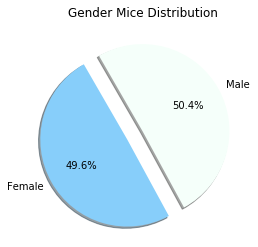

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
number=clean_df.groupby(['Sex'])['Mouse ID'].nunique()
number_df = pd.DataFrame(number)
number_df= number_df.reset_index()
colors=["lightskyblue", "mintcream"]
explode=[0.2,0]

plt.pie(number_df["Mouse ID"], explode=explode, labels=number_df["Sex"], colors=colors, autopct="%1.1f%%", shadow=True, startangle=120)
plt.title("Gender Mice Distribution")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
tumor_data = clean_df.groupby("Mouse ID").max().reset_index()
merge_data = tumor_data[["Mouse ID","Timepoint"]].merge(clean_df,on =["Mouse ID", "Timepoint"], how = 'left')

merge_data = merge_data.round(2)

# Df for each Capomulin, Ramicane, Infubinol, Ceftamin
capomulin= merge_data.loc[merge_data['Drug Regimen'] == 'Capomulin']['Tumor Volume (mm3)']
ramicane= merge_data.loc[merge_data['Drug Regimen'] == 'Ramicane']['Tumor Volume (mm3)']
infubinol=merge_data.loc[merge_data['Drug Regimen'] == 'Infubinol']['Tumor Volume (mm3)']
ceftamin= merge_data.loc[merge_data['Drug Regimen'] == 'Ceftamin']['Tumor Volume (mm3)']

#Capomulin quartiles
quartile_cap= capomulin.quantile([.25,.5,.75])
lower_cap= quartile_cap[.25]
upper_cap=quartile_cap[.75]
iqr= upper_cap-lower_cap
#Capomulin Outliers
Capo_lower= lower_cap-(1.5*iqr)
Capo_upper= upper_cap+(1.5*iqr)

print(f"The lower quartile for Capomulin is {round(lower_cap, 2)}")
print(f"The upper quartile for Capomulin is {round(upper_cap, 2)}")
print(f"Any value below {round(Capo_lower, 2)} can be outlier for Capomulin")
print(f"Any value above {round(Capo_upper, 2)} can be outlier for Capomulin")


The lower quartile for Capomulin is 32.38
The upper quartile for Capomulin is 40.16
Any value below 20.71 can be outlier for Capomulin
Any value above 51.83 can be outlier for Capomulin


In [14]:
#Ramicane quartiles
quartile_cap= ramicane.quantile([.25,.5,.75])
lower_cap= quartile_cap[.25]
upper_cap=quartile_cap[.75]
iqr= upper_cap-lower_cap
#Ramicane Outliers
Rami_lower= lower_cap-(1.5*iqr)
Rami_upper= upper_cap+(1.5*iqr)


print(f"The lower quartile for Ramicane is {round(lower_cap, 2)}")
print(f"The upper quartile for Ramicane is {round(upper_cap, 2)}")
print(f"Any value below {round(Rami_lower, 2)} can be outlier for Ramicane")
print(f"Any value above {round(Rami_upper, 2)} can be outlier for Ramicane")

The lower quartile for Ramicane is 31.56
The upper quartile for Ramicane is 40.66
Any value below 17.91 can be outlier for Ramicane
Any value above 54.31 can be outlier for Ramicane


In [15]:
#Ceftamin quartiles
quartile_cap= ceftamin.quantile([.25,.5,.75])
lower_cap= quartile_cap[.25]
upper_cap=quartile_cap[.75]
iqr= upper_cap-lower_cap
#Ceftamin Outliers
ceft_lower= lower_cap-(1.5*iqr)
ceft_upper= upper_cap+(1.5*iqr)


print(f"The lower quartile for Ceftamin is {round(lower_cap, 2)}")
print(f"The upper quartile for Ceftamin is {round(upper_cap, 2)}")
print(f"Any value below {round(ceft_lower, 2)} can be outlier for Ceftamin")
print(f"Any value above {round(ceft_upper, 2)} can be outlier for Ceftamin")

The lower quartile for Ceftamin is 48.72
The upper quartile for Ceftamin is 64.3
Any value below 25.35 can be outlier for Ceftamin
Any value above 87.67 can be outlier for Ceftamin


In [16]:
#Infubinol quartiles
quartile_cap= infubinol.quantile([.25,.5,.75])
lower_cap= quartile_cap[.25]
upper_cap=quartile_cap[.75]
iqr= upper_cap-lower_cap
#Infubionol Outliers
inf_lower= lower_cap-(1.5*iqr)
inf_upper= upper_cap+(1.5*iqr)


print(f"The lower quartile for Infubinol is {round(lower_cap, 2)}")
print(f"The upper quartile for Infubinol is {round(upper_cap, 2)}")
print(f"Any value below {round(inf_lower, 2)} can be outlier for Infubionol")
print(f"Any value above {round(inf_upper, 2)} can be outlier for Infubionol")

The lower quartile for Infubinol is 54.05
The upper quartile for Infubinol is 65.53
Any value below 36.83 can be outlier for Infubionol
Any value above 82.75 can be outlier for Infubionol


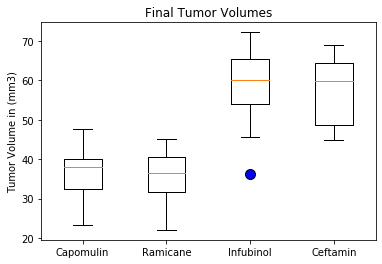

In [17]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
boxplot = dict(markerfacecolor='blue',markersize=10)
plt.boxplot([capomulin,ramicane, infubinol, ceftamin], labels=["Capomulin","Ramicane","Infubinol","Ceftamin"], flierprops= boxplot)

plt.title("Final Tumor Volumes")
plt.ylabel("Tumor Volume in (mm3)")

plt.show()

## Line and Scatter Plots

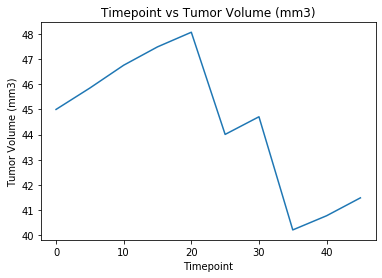

In [18]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulindata= clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']
mouse= clean_df.loc[clean_df['Mouse ID'] == 'l509']



plt.plot(mouse["Timepoint"], mouse["Tumor Volume (mm3)"])
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Timepoint vs Tumor Volume (mm3)")
plt.show()

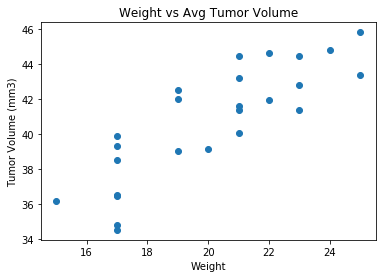

In [19]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

drugcapomulin= clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']

avgweightcap=drugcapomulin.groupby(["Mouse ID"]).mean()

plt.scatter(avgweightcap["Weight (g)"],avgweightcap["Tumor Volume (mm3)"] )
plt.xlabel("Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Avg Tumor Volume")
plt.show()

## Correlation and Regression

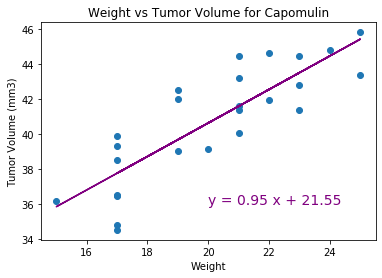

In [20]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

(slope, intercept,rvalue, pvalue, stderr)= st.linregress(avgweightcap["Weight (g)"],avgweightcap["Tumor Volume (mm3)"])
regress_values=avgweightcap["Weight (g)"]* slope + intercept
line= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(avgweightcap["Weight (g)"],avgweightcap["Tumor Volume (mm3)"] )
plt.plot(avgweightcap["Weight (g)"], regress_values, color='purple')
plt.annotate(line,(20,36), color='purple', fontsize=14)
plt.xlabel("Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
plt.show()